In [ ]:
# Installing latest tensorflow GPU
!pip install tensorflow-gpu==2.3.1

     |████████████████████████████████| 320.4MB 48kB/s 


In [ ]:
# import tensorflow as tf
# from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from keras.utils import plot_model
# from tensorflow.keras.optimizers import SGD


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix

#### Getting data from drive and preprocessing using ImageDataGenerator

In [ ]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Resizing image because we have large image but have limited training resource
# setting parameters
image_height =32
image_width = 32
# Processing 10 image at a time
batch_size = 10

In [ ]:
# Getting access  to training,test and validation data
training_data_dir = '/content/drive/My Drive/Datasets/ocr/training_dataset/training_dataset1'
validation_data_dir = '/content/drive/My Drive/Datasets/ocr/validation_dataset/validation_dataset1'
testing_data_dir = '/content/drive/My Drive/Datasets/ocr/testing_dataset/testing_dataset1'

# Generating training, validation and testing data 
# using ImageDataGenerator

training_datagen = ImageDataGenerator(1/255.0)
validation_datagen = ImageDataGenerator(1/255.0)
testing_datagen = ImageDataGenerator(1/255.0)


# Training data
training_data_generator = training_datagen.flow_from_directory(training_data_dir,target_size=(image_width,image_height),batch_size = batch_size,color_mode='grayscale')
# Validation data
validation_data_generator = validation_datagen.flow_from_directory(validation_data_dir,target_size=(image_width,image_height),batch_size = batch_size,color_mode='grayscale')
# Testing data
# why shuffle is set to False?
testing_data_generator = testing_datagen.flow_from_directory(testing_data_dir,target_size=(image_width,image_height),batch_size = batch_size,shuffle= False,color_mode='grayscale')
# why .reset() method is applied to only the testing_data_generator ?
testing_data_generator.reset()

Found 50992 images belonging to 46 classes.
Found 17218 images belonging to 46 classes.
Found 18694 images belonging to 46 classes.


In [ ]:
len(training_data_generator),len(validation_data_generator),len(testing_data_generator)

(5100, 1722, 1870)

In [ ]:
labels = training_data_generator.class_indices
labels
# labels = dict((a,b) for a,b in labels.items())
# labels

{'क': 0,
 'क्ष': 1,
 'ख': 2,
 'ग': 3,
 'घ': 4,
 'ङ': 5,
 'च': 6,
 'छ': 7,
 'ज': 8,
 'ज्ञ': 9,
 'झ': 10,
 'ञ': 11,
 'ट': 12,
 'ठ': 13,
 'ड': 14,
 'ढ': 15,
 'ण': 16,
 'त': 17,
 'त्र': 18,
 'थ': 19,
 'द': 20,
 'ध': 21,
 'न': 22,
 'प': 23,
 'फ': 24,
 'ब': 25,
 'भ': 26,
 'म': 27,
 'य': 28,
 'र': 29,
 'ल': 30,
 'व': 31,
 'श': 32,
 'ष': 33,
 'स': 34,
 'ह': 35,
 '०': 36,
 '१': 37,
 '२': 38,
 '३': 39,
 '४': 40,
 '५': 41,
 '६': 42,
 '७': 43,
 '८': 44,
 '९': 45}

In [ ]:
testing_data_generator.class_indices

{'क': 0,
 'क्ष': 1,
 'ख': 2,
 'ग': 3,
 'घ': 4,
 'ङ': 5,
 'च': 6,
 'छ': 7,
 'ज': 8,
 'ज्ञ': 9,
 'झ': 10,
 'ञ': 11,
 'ट': 12,
 'ठ': 13,
 'ड': 14,
 'ढ': 15,
 'ण': 16,
 'त': 17,
 'त्र': 18,
 'थ': 19,
 'द': 20,
 'ध': 21,
 'न': 22,
 'प': 23,
 'फ': 24,
 'ब': 25,
 'भ': 26,
 'म': 27,
 'य': 28,
 'र': 29,
 'ल': 30,
 'व': 31,
 'श': 32,
 'ष': 33,
 'स': 34,
 'ह': 35,
 '०': 36,
 '१': 37,
 '२': 38,
 '३': 39,
 '४': 40,
 '५': 41,
 '६': 42,
 '७': 43,
 '८': 44,
 '९': 45}

In [ ]:
validation_data_generator.class_indices

{'क': 0,
 'क्ष': 1,
 'ख': 2,
 'ग': 3,
 'घ': 4,
 'ङ': 5,
 'च': 6,
 'छ': 7,
 'ज': 8,
 'ज्ञ': 9,
 'झ': 10,
 'ञ': 11,
 'ट': 12,
 'ठ': 13,
 'ड': 14,
 'ढ': 15,
 'ण': 16,
 'त': 17,
 'त्र': 18,
 'थ': 19,
 'द': 20,
 'ध': 21,
 'न': 22,
 'प': 23,
 'फ': 24,
 'ब': 25,
 'भ': 26,
 'म': 27,
 'य': 28,
 'र': 29,
 'ल': 30,
 'व': 31,
 'श': 32,
 'ष': 33,
 'स': 34,
 'ह': 35,
 '०': 36,
 '१': 37,
 '२': 38,
 '३': 39,
 '४': 40,
 '५': 41,
 '६': 42,
 '७': 43,
 '८': 44,
 '९': 45}

In [ ]:
# Getting classes for future use
labels_ = dict((v,k) for k,v in labels.items())
class_names = [labels_[v] for v in labels_]
class_names

['क',
 'क्ष',
 'ख',
 'ग',
 'घ',
 'ङ',
 'च',
 'छ',
 'ज',
 'ज्ञ',
 'झ',
 'ञ',
 'ट',
 'ठ',
 'ड',
 'ढ',
 'ण',
 'त',
 'त्र',
 'थ',
 'द',
 'ध',
 'न',
 'प',
 'फ',
 'ब',
 'भ',
 'म',
 'य',
 'र',
 'ल',
 'व',
 'श',
 'ष',
 'स',
 'ह',
 '०',
 '१',
 '२',
 '३',
 '४',
 '५',
 '६',
 '७',
 '८',
 '९']

### **Building CNN**

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (image_width,image_height,1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(46, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0

In [ ]:
# sgd = SGD(lr=0.01, decay = 1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# Defining number of epochs before training  to get epochs value for plotting learning curve
### Start your code here ###
# replace 1 with desired number of epochs
epochs = 5
### End your code here ###

In [15]:
# To save training and validation loss and accuracy
history = model.fit_generator(generator = training_data_generator,epochs=epochs,steps_per_epoch = len(training_data_generator),validation_data = validation_data_generator,validation_steps= len(validation_data_generator))

Instructions for updating:
Please use Model.fit, which supports generators.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/5
5100/5100 [==============================] - 22894s 4s/step - loss: 1.2935 - accuracy: 0.6513 - val_loss: 0.3618 - val_accuracy: 0.8963
Epoch 2/5
5100/5100 [==============================] - 367s 72ms/step - loss: 0.4644 - accuracy: 0.8616 - val_loss: 0.2214 - val_accuracy: 0.9345
Epoch 3/5
5100/5100 [==============================] - 354s 69ms/step - loss: 0.3646 - accuracy: 0.8908 - val_loss: 0.1943 - val_accuracy: 0.9406
Epoch 4/5
5100/5100 [==============================] - 357s 70ms/step - loss: 0.3184 - accuracy: 0.9059 - val_loss: 0.1511 - val_accuracy: 0.9524
Epoch 5/5
5100/5100 [==============================] - 378s 74ms/step - loss: 0.2937 - accuracy: 0.9142 - val_loss: 0.1701 - val_accuracy: 0.9491


In [ ]:
# Saving what  model structure looks like for future documentation purpose
plot_model(model, to_file='/content/drive/My Drive/saved_images/devanagari_character_recognition_0.0.1_model.png',show_shapes =
True)

###**Saving Model to Google Drive for future use**

In [ ]:
# Saving above model  in  .h5 format   in drive location content/drive/My Drive/Saved_models/{name of model.h5}
# Change directory according to your directory structure
model.save('/content/drive/My Drive/saved_models/tobefinal.h5')

### **Plotting Learning curve: To see how model performs training and validation**

In [ ]:
def plot_learning_curve(epochs,history):
  # Plotting training and validation accuracy
  epochs = epochs +1 
  
  epochs = range(1,epochs)
  plt.plot(epochs,history.history['accuracy'])
  plt.plot(epochs,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper right')
  plt.show()

  # Plotting training and validation loss
  epochs = range(1,epochs)
  plt.plot(epochs,history.history['loss'])
  plt.plot(epochs,history.history['val_loss'])
  plt.title('Model loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper right')
  plt.show()
  

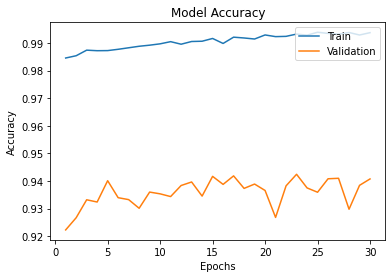

TypeError: ignored

In [ ]:
plot_learning_curve(epochs,history)

# **Testing model**

###**Single character testing**

In [ ]:
# value can range from 0 to 45 (class index)
def get_character_label(value):
  # To get the class labels the images in test dataset belong to.
  # Getting class indices of training_data_generator
  labels = (training_data_generator.class_indices)

  # Reversing key value pairs
  # Example
  # Reversing 'ट': 12
  # To make 12: 'ट'
  prediction_labels = dict((v,k) for k,v in labels.items())
  print('Index : "Label" mapping of  training classes are: {}'.format(prediction_labels))

  prediction_character= [prediction_labels[k] for k in [value]]
  return prediction_character[0]

In [ ]:
# To plot input testing image
def plot_input_testing_character(character_dir):
  import cv2 
  testing_character = cv2.imread(character_dir,1) 
  print('*********************************Your Input Image is:*****************************************   ')
  # plotting input image
  plt.imshow(testing_character)
  return testing_character


In [ ]:
def predict_character(testing_character,model_dir):

    from tensorflow.keras.models import load_model
    print('size  of  testing image is : {}'.format(testing_character.shape))

    # Making our image 4D inorder to testing
    # expanding dimension from axis 0
    testing_character_4d= np.expand_dims(testing_character,axis=(0))
    print('size of testing image after expanding dimension is : {}'.format(testing_character_4d.shape))

    # Loading model
    model = load_model(model_dir)

    print('\n******************************Prediction*************************************************')
    # Testing above character
    predict_character = model.predict(testing_character_4d)

    #  Find -> For which character index model predict high probhability
    print('\nModel predict probabilty of all characters in array: {}'.format(predict_character))

    # Return the index of image classes
    # from 0 to 45
    # Which has high probability prediction
    character_index= np.argmax(predict_character)
    print(character_index)

    # Getting label from character_index
    # Calling function get_character_label
    character_label_= get_character_label(character_index)
    print('\nYour Input testing character is : {}'.format(character_label_))






In [ ]:
# Change directory according to your directory structure
character_directory ='/content/drive/My Drive/Datasets/ocr/validation_dataset/validation_dataset1/ख/13210.png'
model_directory = '//content/drive/My Drive/Saved_models/blackbook_model.h5'

*********************************Your Input Image is:*****************************************   


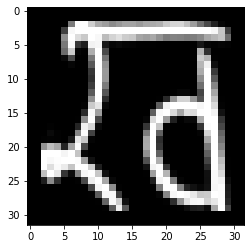

In [ ]:
# Plot input testing character
testing_character = plot_input_testing_character(character_directory)

In [ ]:
# Get predicted character label from your input testing character
predict_character(testing_character,model_directory)

size  of  testing image is : (32, 32, 3)
size of testing image after expanding dimension is : (1, 32, 32, 3)

******************************Prediction*************************************************

Model predict probabilty of all characters in array: [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
2
Index : "Label" mapping of  training classes are: {0: 'क', 1: 'क्ष', 2: 'ख', 3: 'ग', 4: 'घ', 5: 'ङ', 6: 'च', 7: 'छ', 8: 'ज', 9: 'ज्ञ', 10: 'झ', 11: 'ञ', 12: 'ट', 13: 'ठ', 14: 'ड', 15: 'ढ', 16: 'ण', 17: 'त', 18: 'त्र', 19: 'थ', 20: 'द', 21: 'ध', 22: 'न', 23: 'प', 24: 'फ', 25: 'ब', 26: 'भ', 27: 'म', 28: 'य', 29: 'र', 30: 'ल', 31: 'व', 32: 'श', 33: 'ष', 34: 'स', 35: 'ह', 36: '०', 37: '१', 38: '२', 39: '३', 40: '४', 41: '५', 42: '६', 43: '७', 44: '८', 45: '९'}

Your Input testing character is : ख


## **Testing model and plotting confusion matrix**

#### Loading Model from drive

In [ ]:
model= load_model('/content/drive/My Drive/Saved_models/blackbook_model.h5')
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 64)        4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 256)              

In [ ]:
# Testing model
# Verbose is helpful to show progress bar
test_pred = model.predict_generator(testing_data_generator,steps = (testing_data_generator.samples/testing_data_generator.batch_size),verbose =1)

Instructions for updating:
Please use Model.predict, which supports generators.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


  12/1869 [..............................] - ETA: 1:27:44

In [ ]:
# Let see how test_pred look like
test_pred.shape

In [ ]:
# We need only one class label having high probability
test_pred_ = np.argmax(test_pred, axis=1)

In [ ]:
# Shape of test_pred_
test_pred_.shape

#### Plotting confusion matrix

In [ ]:
# To plot confusion matrix , first we need two parameters
# Testing image actual class labels
#  testing image predicted class labels

In [ ]:
# Testing image actual class labels
testing_data_generator.classes

In [ ]:
testing_data_generator.shape

In [ ]:
cm = confusion_matrix(testing_data_generator.classes,test_pred_) 

In [ ]:
# How confusion matrix look like
cm.shape

Plotting confusion matrix with the help of mlxtend library





In [ ]:
# Plotting confusion matrix using mlxtend library
! pip install mlxtend

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(conf_mat=cm,
                                figsize=(20,20),
                                show_normed=False,
                                colorbar=True)
# class_name = classes argument not works why?

Plotting confusion matrix with the help of Seaborn heatmap

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(cm,annot=True,square= True,fmt ='d',cbar = True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Try another color map (cmap)
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(cm,annot=True,square= True,fmt ='d',cbar = True,cmap="YlGnBu")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()


Why heatmap doesn't support devanagari font
-  Solution available for chinese font [here](https://github.com/mwaskom/seaborn/issues/1009)

In [ ]:
# Approach 1
cm_df = pd.DataFrame(cm,class_names,class_names)
cm_df.head()

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
plt.figure(figsize=(10,10))  
sns.heatmap(cm_df, annot=True)
plt.show()

In [ ]:
# Approach 2
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(cm,annot=True,square= True,fmt ='d',cbar = True )
ax.xaxis.set_ticklabels(class_names )
ax.yaxis.set_ticklabels(class_names)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()


Let rename Devanagari classes to Roman and label them on Confusion Matrix

### Plotting classification report

In [ ]:
cr =  classification_report(testing_data_generator.classes,test_pred_)
cr